In [ ]:
!pip install -U flask-cors

In [ ]:
!pip install opencv-python

 * Running on http://172.30.1.6:5000/ (Press CTRL+C to quit)


POST


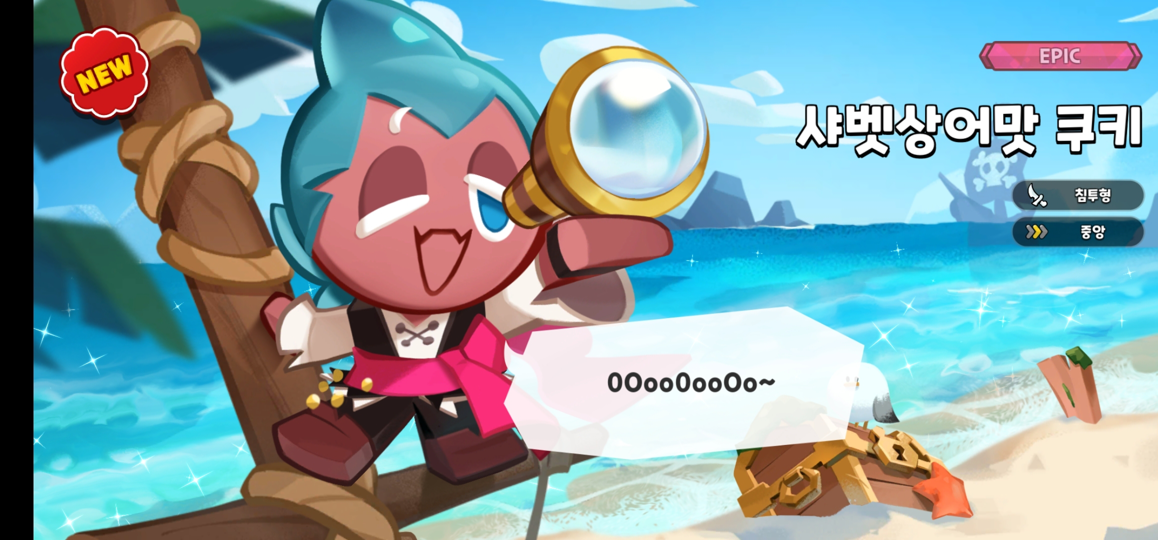

172.30.1.39 - - [10/Aug/2021 16:23:25] "POST /sendFrame HTTP/1.1" 200 -


POST


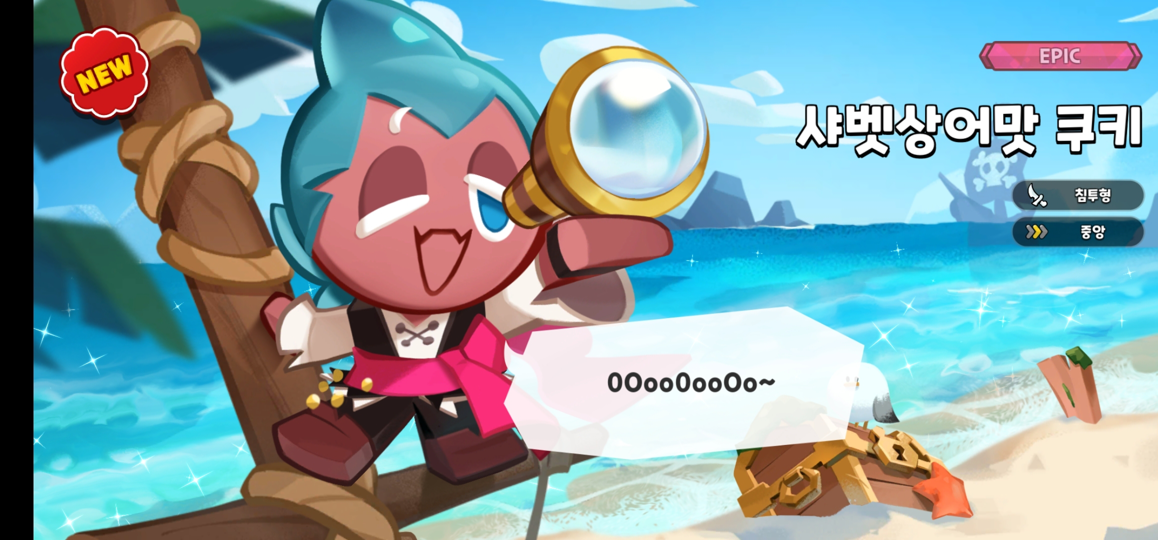

172.30.1.39 - - [10/Aug/2021 16:29:52] "POST /sendFrame HTTP/1.1" 200 -


In [4]:
from flask import Flask, redirect, request, Response
import base64
import io
from PIL import Image
from flask_cors import CORS
from werkzeug.serving import run_simple

app = Flask(__name__)
CORS(app)

@app.route("/sendFrame", methods=['POST']) 
def re():
    print(request.method)
    if request.method == 'POST':
        
        #안드로이드에서 'image'변수에 base64로 변환된 bitmap이미지
        one_data = request.form['image']
        
        #base64로 인코딩된 이미지 데이터를 디코딩하여 byte형태로 변환
        imgdata = base64.b64decode(one_data)
        
        #byte형태의 이미지 데이터를 이미지로 변환
        image = Image.open(io.BytesIO(imgdata))
        
        #이미지 사이즈 조정
        img_resize = image.resize((int(image.width / 2), int(image.height / 2)))
        
        display(img_resize)
        
        #이미지 분석관련 코드 작성
        
    #결과값 리턴    
    return 'true'

if __name__ == "__main__":
    run_simple('172.30.1.6', 5000, app)